Import các thư viện

In [1]:
import string
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
 
 

In [2]:
#Connect to gg drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [3]:
import os
os.chdir("drive/My Drive/Colab Notebooks/dataset")

In [4]:
import ast
def load_corpus_file():
    f = open('corpus_final.txt', "r")
    corpus = []
    i = 0
    for doc in f:
        # print(doc)
        doc = doc.replace('"',"")
        corpus.append(ast.literal_eval(doc))
    f.close()
    return corpus

Tiền xử lý dữ liệu: Lowercase, xóa các dấu câu

In [5]:
data = load_corpus_file()


# # Preprocessing data to lowercase all words and remove single punctuation words
# document = load_corpus_file()
# data = []
# for sent in document:
#   new_sent = []
#   for word in sent:
#     new_word = word.lower()
#     if new_word[0] not in string.punctuation:
#       new_sent.append(new_word)
#   if len(new_sent) > 0:
#     data.append(new_sent)
 

Khởi tạo mô hình Word2Vec

In [6]:
# Creating Word2Vec
model = Word2Vec(
    sentences = data,
    size = 300, #vector dimension
    window = 10,
    iter = 20, #epoch
)
 #Time: 4547.06s = 1h26p

Lưu mô hình xuống

In [7]:
model.save('Word2Vec_model.w2v')

Vector for love:
[-1.5069789e+00  1.3697450e-01  2.8444898e+00 -5.5624640e-01
  8.1261975e-01  9.0012717e-01  1.4276462e+00  1.8495226e+00
  9.4718301e-01 -7.1322018e-01  4.4787437e-01 -2.6415005e+00
 -1.9193252e+00 -1.7423773e+00  4.6444827e-01 -6.2539202e-01
 -2.1696191e+00  2.2155540e-01  1.8544632e+00 -2.0599778e+00
 -3.2173239e-02 -5.4007429e-01 -7.6055396e-01 -1.3413782e+00
 -2.8639636e+00 -4.0293017e-01  6.8625897e-01  8.3104029e-02
  1.5274806e+00  1.6374409e+00 -1.2143182e+00  4.4038099e-01
 -2.8731380e+00 -9.1912049e-01  3.5082805e-01  1.6162922e+00
 -1.5436198e+00 -1.8626392e+00  2.1779680e+00  1.4521037e+00
  4.2203650e+00 -4.4041742e-02  1.6657385e+00  9.2443764e-01
  2.6489537e+00  1.6502015e-01  2.5395012e+00  5.9580153e-01
 -1.2412267e+00  2.5142017e-01  3.2818590e-03 -3.3924551e+00
  6.1781615e-01 -1.2158744e+00  2.1203470e+00 -1.0372170e+00
 -2.1440196e+00  4.1743393e+00  2.0542123e+00 -1.9977361e+00
  3.2536619e+00  6.3307750e-01 -1.6924858e+00  6.6814882e-01
  1.331

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.


('ipad', 0.7381370663642883)
('smartphone', 0.6941944360733032)
('oneplus', 0.6657409071922302)
('apple', 0.6646316051483154)
('ios', 0.6442379951477051)
('iphones', 0.6369094848632812)
('samsung', 0.6294729709625244)
('android', 0.618599534034729)
('imac', 0.5751791596412659)
('airpods', 0.569436252117157)
('ipod', 0.5629492998123169)
('handset', 0.5595245361328125)
('macbook', 0.5584651231765747)
('realme', 0.5558003187179565)
('laptop', 0.5552893877029419)



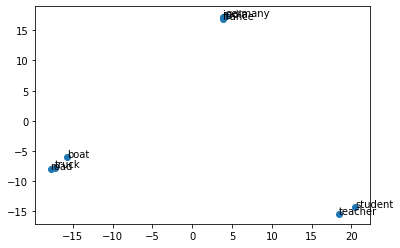

In [8]:

# Vector for word love
print("Vector for love:")
print(model.wv["love"])
print()
 
# Finding most similar words
test_word = "iphone"
print("3 words similar to " + test_word)
words = model.most_similar(test_word, topn=15)
for word in words:
  print(word)
print()
 
#Visualizing data
words = ["france", "germany", "india", "truck", "boat", "road", "teacher", "student"]
 
X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
 
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()